# O que é PNAD?
A Pesquisa Nacional por Amostra de Domicílios (PNAD) era uma pesquisa anual realizada pelo IBGE nos domicílios brasileiros para apurar características gerais da população, incluindo dados de educação, trabalho, rendimento e habitação, além de levantar, com periodicidade variável, outros temas, de acordo com as necessidades de informação para o país.

A pesquisa foi encerrada em 2016 e substituída, com metodologia atualizada, pela Pesquisa Nacional por Amostra de Domicílios Contínua – PNAD Contínua.

## Resumo
Será feita uma análise do conjunto de dados da PNAD de 2012, a fim de extrair informações relevantes

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = 8, 5

### Visão geral

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/neylsoncrepalde/introducao_ao_r/master/dados/pes_2012.csv")
df.head()

V0101        UF      V0302  V8005   V0404            V4803 V4718 V4720  \
0   2012  Rondônia  Masculino     48  Branca  15 anos ou mais  3000  3000   
1   2012  Rondônia   Feminino     48  Branca  15 anos ou mais  3000  3000   
2   2012  Rondônia   Feminino     23  Branca  15 anos ou mais  1100  1100   
3   2012  Rondônia   Feminino     21  Branca          14 anos  1100  1100   
4   2012  Rondônia   Feminino     54  Branca  15 anos ou mais   NaN   460   

   V4729  
0    232  
1    232  
2    232  
3    232  
4    232

***
### Informações adcionais

In [19]:
df.shape

(362451, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362451 entries, 0 to 362450
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   V0101   362451 non-null  int64 
 1   UF      362451 non-null  object
 2   V0302   362451 non-null  object
 3   V8005   362451 non-null  int64 
 4   V0404   362451 non-null  object
 5   V4803   362451 non-null  object
 6   V4718   173539 non-null  object
 7   V4720   309512 non-null  object
 8   V4729   362451 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 24.9+ MB


***
### Renomeando Colunas

In [21]:
df.columns = ['Ano', 'Estado', 'Sexo', 'Idade', 'Cor da pele', 'Anos de escolaridade', 'Renda principal', 'Renda total',
       'Peso amostral']

In [22]:
df.head()

Ano    Estado       Sexo  Idade Cor da pele Anos de escolaridade  \
0  2012  Rondônia  Masculino     48      Branca      15 anos ou mais   
1  2012  Rondônia   Feminino     48      Branca      15 anos ou mais   
2  2012  Rondônia   Feminino     23      Branca      15 anos ou mais   
3  2012  Rondônia   Feminino     21      Branca              14 anos   
4  2012  Rondônia   Feminino     54      Branca      15 anos ou mais   

  Renda principal Renda total  Peso amostral  
0            3000        3000            232  
1            3000        3000            232  
2            1100        1100            232  
3            1100        1100            232  
4             NaN         460            232

***
### Distruibuição da cor da pele

In [23]:
(df["Cor da pele"].value_counts() / df.shape[0]) * 100

Parda             47.932824
Branca            42.928561
Preta              8.310089
Amarela            0.427644
Indígena           0.395916
Sem declaração     0.004966
Name: Cor da pele, dtype: float64

***
### distribuição do sexo

In [24]:
(df["Sexo"].value_counts() / df.shape[0]) * 100

Feminino     51.33218
Masculino    48.66782
Name: Sexo, dtype: float64

***
### Média de idade, moda e desvio padrão


In [25]:
print(f'Média: {df["Idade"].mean()}\nModa: {df["Idade"].mode()}\nDesvio Padrão: {df["Idade"].std()}')

Média: 32.63801175883085
Moda: 0    14
dtype: int64
Desvio Padrão: 20.77032627236788


***
### Verificando valores nulos

In [26]:
df.isnull().sum()

Ano                          0
Estado                       0
Sexo                         0
Idade                        0
Cor da pele                  0
Anos de escolaridade         0
Renda principal         188912
Renda total              52939
Peso amostral                0
dtype: int64

***
### Convertendo para float as variveis que indicam a renda

In [27]:
df.dtypes

Ano                      int64
Estado                  object
Sexo                    object
Idade                    int64
Cor da pele             object
Anos de escolaridade    object
Renda principal         object
Renda total             object
Peso amostral            int64
dtype: object

In [28]:
df["Renda principal"] = pd.to_numeric(df["Renda principal"], errors="coerce")
df["Renda total"] = pd.to_numeric(df["Renda total"], errors="coerce")

In [29]:
df.dtypes

Ano                       int64
Estado                   object
Sexo                     object
Idade                     int64
Cor da pele              object
Anos de escolaridade     object
Renda principal         float64
Renda total             float64
Peso amostral             int64
dtype: object

### Analisando renda por sexo

In [30]:
df[["Sexo","Renda total"]].groupby("Sexo").describe()

Renda total                                                     \
                count         mean          std  min  25%    50%     75%   
Sexo                                                                       
Feminino     157849.0   747.741303  1782.714806  0.0  0.0  530.0   822.0   
Masculino    145785.0  1257.060980  3060.785575  0.0  1.0  700.0  1300.0   

                     
                max  
Sexo                 
Feminino   315000.0  
Masculino  351600.0

Apesar de ter mais mulheres, a média de renda dos homens é maior, também podemos observar através do desvio padrão que a renda dos homens tem uma oscilação muito maior

***
### Visualizando distruibuição de renda por idade

In [31]:
sns.set_style("whitegrid")

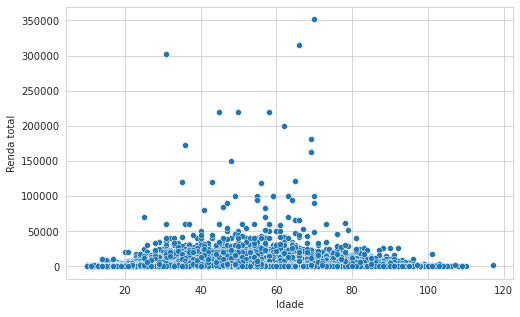

In [32]:
sns.scatterplot(y="Renda total", x="Idade", data=df)
plt.show()

### Distribuição da cor da pele

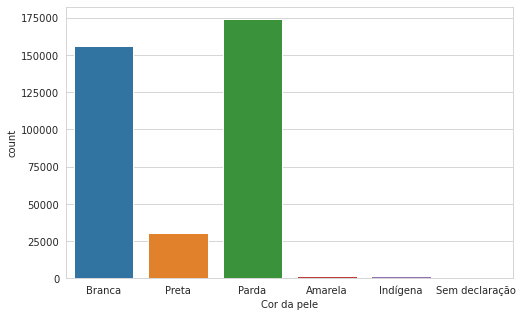

In [33]:
sns.countplot(x="Cor da pele", data=df)
plt.show()

### Extraindo sub-amostra de pessoas entre 18 e 80 anos e que tenham alguma renda

In [34]:
amostra = df.loc[(df["Idade"] >= 18) & (df["Idade"] <= 80) & (df["Renda total"] > 0)]

In [35]:
amostra.head()

Ano    Estado       Sexo  Idade Cor da pele Anos de escolaridade  \
0  2012  Rondônia  Masculino     48      Branca      15 anos ou mais   
1  2012  Rondônia   Feminino     48      Branca      15 anos ou mais   
2  2012  Rondônia   Feminino     23      Branca      15 anos ou mais   
3  2012  Rondônia   Feminino     21      Branca              14 anos   
4  2012  Rondônia   Feminino     54      Branca      15 anos ou mais   

   Renda principal  Renda total  Peso amostral  
0           3000.0       3000.0            232  
1           3000.0       3000.0            232  
2           1100.0       1100.0            232  
3           1100.0       1100.0            232  
4              NaN        460.0            232

### Distribuição da renda por sexo

In [36]:
amostra[["Sexo","Renda total"]].groupby("Sexo").mean().sort_values(by="Renda total", ascending=False)

Renda total
Sexo                  
Masculino  1730.798281
Feminino   1168.730579

### Distruibuição de renda por cor da pele

In [37]:
amostra[["Cor da pele","Renda total"]].groupby("Cor da pele").mean().\
sort_values(by="Renda total", ascending=False)

Renda total
Cor da pele                
Amarela         2700.308628
Branca          1887.368195
Indígena        1124.150215
Parda           1111.447143
Preta           1085.736557
Sem declaração   622.000000

### Verificando distribuição dos estados

In [38]:
((amostra["Estado"].value_counts() / amostra.shape[0]) * 100).head(10)

São Paulo            11.185225
Minas Gerais          9.891590
Rio Grande do Sul     8.533099
Bahia                 7.292846
Rio de Janeiro        6.924662
Pernambuco            5.920386
Pará                  5.633522
Paraná                5.381580
Ceará                 5.049316
Goiás                 4.413225
Name: Estado, dtype: float64

### distruibuição da renda por sexo e cor da pele

In [39]:
amostra[["Sexo","Renda total","Cor da pele"]].groupby(["Cor da pele","Sexo"]).mean()

Renda total
Cor da pele    Sexo                  
Amarela        Feminino   2041.119048
               Masculino  3389.325792
Branca         Feminino   1505.658569
               Masculino  2257.939164
Indígena       Feminino    923.272455
               Masculino  1307.967123
Parda          Feminino    887.403685
               Masculino  1317.552160
Preta          Feminino    869.895289
               Masculino  1277.578274
Sem declaração Feminino    622.000000

### Verificando media salarial de cada idade

In [40]:
dado = amostra[["Idade","Renda total"]].groupby("Idade").mean()
dado.reset_index(inplace=True)
dado.head()

Idade  Renda total
0     18   622.172790
1     19   699.414307
2     20   767.838549
3     21   808.828689
4     22   847.811980

### Visualizando a distribuição da media salarial de cada idade

<AxesSubplot:xlabel='Idade', ylabel='Renda total'>

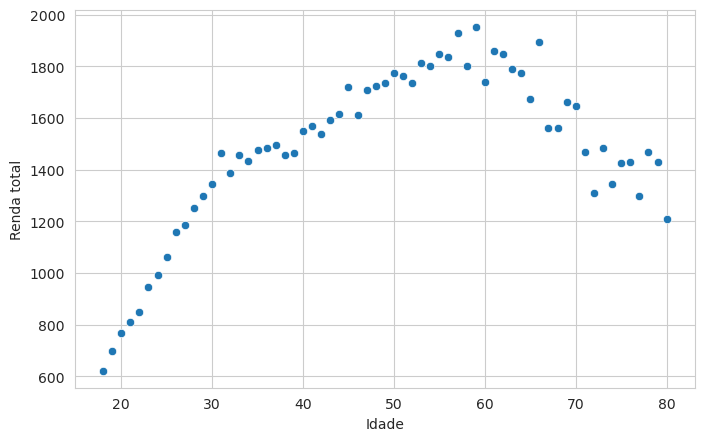

In [41]:
plt.figure(dpi=100)
sns.scatterplot(x="Idade", y="Renda total", data=dado)

### Tratando variavel anos de escolaridade, eliminando strings e convertendo para inteiro

In [42]:
def filtra(x):
    if "Sem" in x.split(" ")[0]:
        return 0
    if "Não" in x.split(" ")[0]:
        return 0
    else:
        return x.split(" ")[0]
    
amostra["Anos de escolaridade"] = pd.to_numeric(amostra["Anos de escolaridade"].\
                                                apply(lambda x:filtra(x)))

### Verificando dados da variavel anos de escolaridade

In [43]:
amostra["Anos de escolaridade"].describe()

count    200443.000000
mean          7.981556
std           4.613845
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          15.000000
Name: Anos de escolaridade, dtype: float64

### Analisando diferença de escolaridades entre homens e mulheres

In [44]:
amostra[["Anos de escolaridade","Sexo"]].groupby("Sexo").mean()

Anos de escolaridade
Sexo                           
Feminino               8.201440
Masculino              7.774951

### Visualizando distribuição de anos completos de escolaridade por sexo

<AxesSubplot:xlabel='Anos de escolaridade', ylabel='Count'>

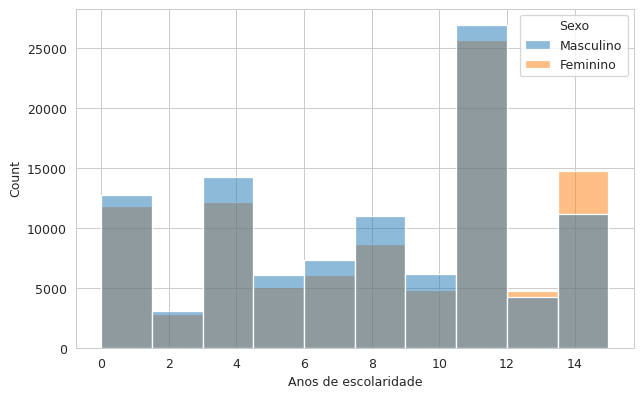

In [45]:
plt.figure(dpi=90)
sns.histplot(x=amostra["Anos de escolaridade"], hue=amostra["Sexo"], bins=10)